Valores faltantes por columna antes de limpiar:
horas_estudio_semanal          0
nota_anterior                  0
tasa_asistencia                0
horas_sueno                  150
edad                           0
nivel_dificultad               0
tiene_tutor                    0
horario_estudio_preferido    100
estilo_aprendizaje            50
nota_final                     0
aprobado                       0
dtype: int64


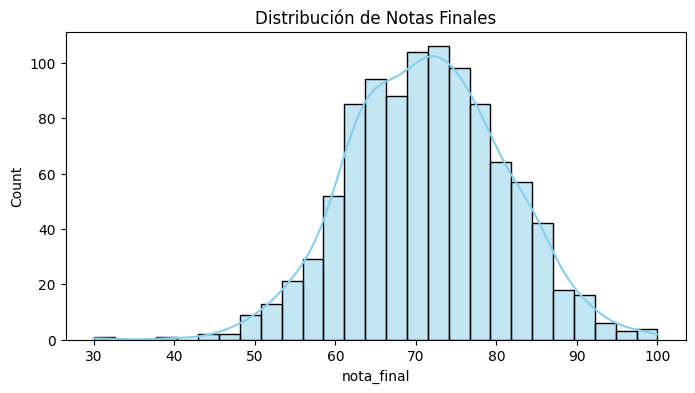

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#1.ANALISIS EXPLORATORIO
# Cargar el dataset
df = pd.read_csv('dataset_estudiantes (1).csv')

# Inspección de nulos
print("Valores faltantes por columna antes de limpiar:")
print(df.isnull().sum())

# Visualización de la distribución de la nota final
plt.figure(figsize=(8, 4))
sns.histplot(df['nota_final'], kde=True, color='skyblue')
plt.title('Distribución de Notas Finales')
plt.show()

In [3]:
#2.PREPROCESAMIENTO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 2.1. Limpieza profunda de Nulos
# Para números: usamos el promedio (media)
df['horas_sueno'] = df['horas_sueno'].fillna(df['horas_sueno'].mean())

# Para categorías: usamos el más frecuente (moda)
df['horario_estudio_preferido'] = df['horario_estudio_preferido'].fillna(df['horario_estudio_preferido'].mode()[0])
df['estilo_aprendizaje'] = df['estilo_aprendizaje'].fillna(df['estilo_aprendizaje'].mode()[0])

# 2.2. Convertir texto a números (Encoding)
le = LabelEncoder()
categorical_cols = ['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido', 'estilo_aprendizaje']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 2.3. Definir X (características) y Y (objetivos)
X = df.drop(['nota_final', 'aprobado'], axis=1)
y_reg = df['nota_final']
y_clf = df['aprobado']

# 2.4. Escalado (importante para Regresión Lineal)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("¡Limpieza completada! Ya no hay valores NaN.")

¡Limpieza completada! Ya no hay valores NaN.


In [4]:
#3.ENTRENAMIENTO DEL MODELO DE REGRESIÓN
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

modelo_reg = LinearRegression()
modelo_reg.fit(X_train, y_train)

preds_reg = modelo_reg.predict(X_test)
print(f"Error Medio (MAE): {mean_absolute_error(y_test, preds_reg):.2f}")
print(f"Precisión del modelo (R2): {r2_score(y_test, preds_reg):.2f}")

Error Medio (MAE): 5.87
Precisión del modelo (R2): 0.37



--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.33      0.13      0.19        15
           1       0.93      0.98      0.96       185

    accuracy                           0.92       200
   macro avg       0.63      0.56      0.57       200
weighted avg       0.89      0.92      0.90       200



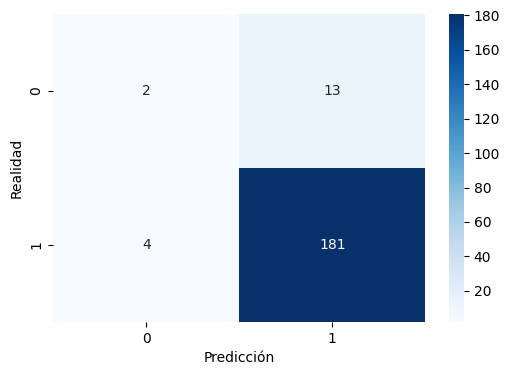

In [5]:
#4.ENTRENAMIENTO DE UN MODELO DE CLASIFICACIÓN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_clf, test_size=0.2, random_state=42)

modelo_clf = RandomForestClassifier(random_state=42)
modelo_clf.fit(X_train_c, y_train_c)

preds_clf = modelo_clf.predict(X_test_c)
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test_c, preds_clf))

# Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_c, preds_clf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [6]:
#5.VALIDACIÓN
# Datos de un nuevo estudiante (deben estar en el mismo orden que las columnas de X)
# Horas: 10, NotaAnt: 70, Asist: 90, Sueño: 7, Edad: 20, Dificultad: 1, Tutor: 0, Horario: 2, Estilo: 1
nuevo_estudiante = [[10, 70, 90, 7, 20, 1, 0, 2, 1]]

# Escalamos los datos (igual que hicimos con el dataset original)
nuevo_estudiante_scaled = scaler.transform(nuevo_estudiante)

# Aplicamos la Regresión
nota_predicha = modelo_reg.predict(nuevo_estudiante_scaled)
print(f"La nota estimada es: {nota_predicha[0]:.2f}")

# Aplicamos la Clasificación
estado_predicho = modelo_clf.predict(nuevo_estudiante_scaled)
resultado = "Aprobado" if estado_predicho[0] == 1 else "Reprobado"
print(f"El estado del estudiante será: {resultado}")

La nota estimada es: 72.38
El estado del estudiante será: Aprobado


c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
